In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('bmi.csv')
df.head()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2


In [5]:
df.isnull().sum()

Age         0
Height      0
Weight      0
Bmi         0
BmiClass    0
dtype: int64

In [6]:
df['BmiClass'].value_counts()

BmiClass
Normal Weight    342
Overweight       166
Underweight       96
Obese Class 3     62
Obese Class 2     55
Obese Class 1     20
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import OrdinalEncoder
onc = OrdinalEncoder()
df['BmiClass'] = onc.fit_transform(df[['BmiClass']])
df['BmiClass'].value_counts()

BmiClass
0.0    342
4.0    166
5.0     96
3.0     62
2.0     55
1.0     20
Name: count, dtype: int64

In [9]:
df.head()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,1.0
1,60,1.71,79.02,27.023700,4.0
2,60,1.55,74.70,31.092612,1.0
3,60,1.46,35.90,16.841809,5.0
4,60,1.58,97.10,38.896010,2.0


In [10]:
import math
print(math.sqrt(df.shape[0]))

27.2213151776324


In [11]:
x = df.drop('BmiClass', axis=1)
x.head()

,Age,Height,Weight,Bmi
0,61,1.85,109.30,31.935720
1,60,1.71,79.02,27.023700
2,60,1.55,74.70,31.092612
3,60,1.46,35.90,16.841809
4,60,1.58,97.10,38.896010


<Axes: xlabel='Age', ylabel='count'>

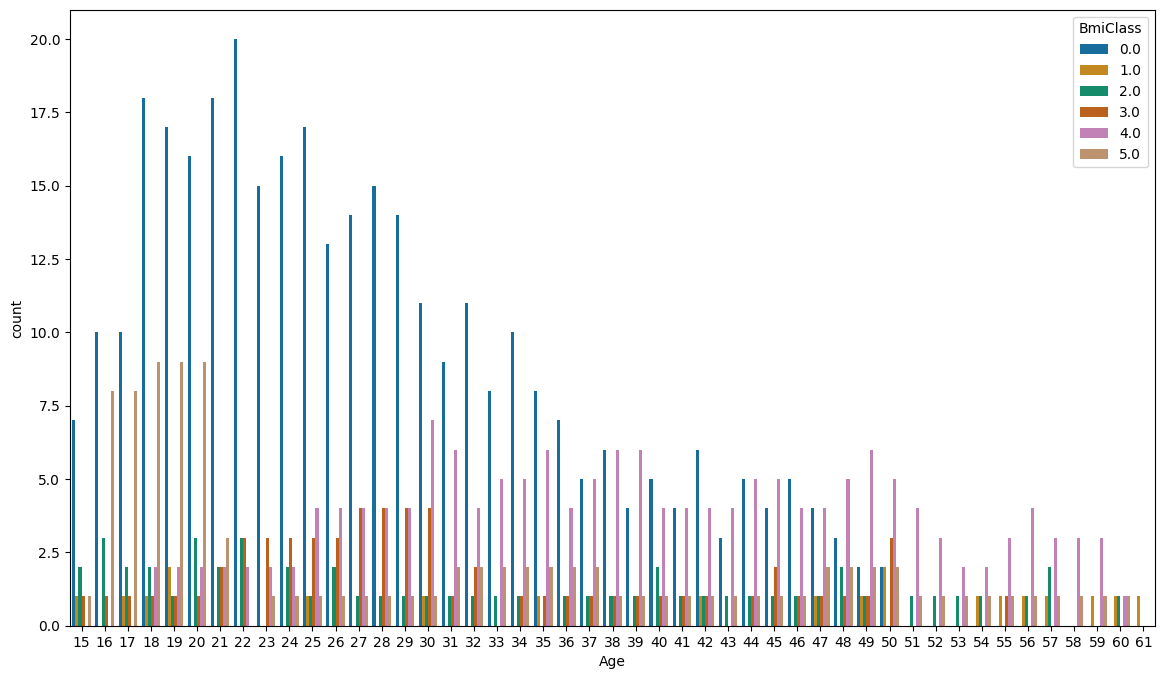

In [28]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.countplot(x='Age', hue='BmiClass', data=df, palette='colorblind')

In [14]:
y = df['BmiClass']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier()

In [34]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
pred = knn.predict(x_test)

In [36]:
knn.score(x_test, y_test)

0.9301075268817204